In [1]:
import time

t0 = time.perf_counter()
from materials import *
tf = time.perf_counter()

print(f"Materials module took {tf-t0}s to load.")

> Imported materials!
Materials module took 4.517810600000001s to load.


In [2]:
t0 = time.perf_counter()
material = Material("Water")
tf = time.perf_counter()

print(f"Material object took {tf-t0}s to load.")

Material object took 12.52168s to load.


In [3]:
material.printKeys()

 *** RELAX:  Z =  1,  no. of shells =  1,  no. of transitions =   0
 *** RELAX:  Z =  8,  no. of shells =  4,  no. of transitions =   8
 *** Electron scaled bremss x-section,  ZEQ = 4.69042E+00,  NDATA =  57
 *** Bremss angular distribution,  ZEQ = 4.69042E+00,  NDATA =  24
 *** Stopping powers for electrons and positrons,  NDATA = 119
 ***  Electron and positron elastic cross sections,  NDATA = 111
 ***  Electron elastic differential cross sections
 ***  Positron elastic differential cross sections
 ***  Electron ionisation cross sections,  IZ =  1,  NSHELL =  1,  NDATA = 211
 ***  Electron ionisation cross sections,  IZ =  8,  NSHELL =  1,  NDATA = 198
 ***  Positron ionisation cross sections,  IZ =  1,  NSHELL =  1,  NDATA = 210
 ***  Positron ionisation cross sections,  IZ =  8,  NSHELL =  1,  NDATA = 198
 ***  Rayleigh scattering.  NQ = 250,  NE =  975
 *** Compton and pair-production cross sections,  NDATA = 140
 ***  Photoelectric cross sections,  IZ =  1,  NSHELL =  0,  NDATA =

In [35]:
text = material.getData('Bremss angular distribution')
print("E\t", "k", "A", "B")
for line in text:
    print(line[4:])

E	 k A B
  1.000E+03  0.000E+00  1.8483578E-01 -2.0315702E-02
  1.000E+03  6.000E-01  7.1049942E-02 -8.9222640E-03
  1.000E+03  8.000E-01  4.1627757E-02 -7.4499857E-03
  1.000E+03  9.500E-01  1.8601471E-02 -6.7830169E-03
  5.000E+03  0.000E+00  4.5694700E-01 -3.0826245E-02
  5.000E+03  6.000E-01  1.5855800E-01 -4.7476120E-03
  5.000E+03  8.000E-01  8.5253256E-02 -3.5612155E-03
  5.000E+03  9.500E-01  3.0644310E-02 -3.1238607E-03
  1.000E+04  0.000E+00  6.5956486E-01 -3.7558475E-02
  1.000E+04  6.000E-01  2.2141058E-01 -2.1177666E-03
  1.000E+04  8.000E-01  1.1249403E-01 -8.7223555E-04
  1.000E+04  9.500E-01  3.4829091E-02 -1.7278552E-03
  5.000E+04  0.000E+00  1.4662321E+00 -5.6270563E-02
  5.000E+04  6.000E-01  4.9162031E-01  3.7212327E-03
  5.000E+04  8.000E-01  2.3703469E-01  3.8323276E-03
  5.000E+04  9.500E-01  4.7931951E-02  3.5755359E-03
  1.000E+05  0.000E+00  1.9847738E+00 -6.1098418E-02
  1.000E+05  6.000E-01  7.1952604E-01  1.0693563E-02
  1.000E+05  8.000E-01  3.7725344E-01

In [30]:
ang = {}
for line in text:
    numbers = [float(x) for x in line.split()]
    _, _, E, k, A, B = numbers
    try:
        ang[E][k] = (A, B)
    except:
        ang[E] = {k: (A, B)}
    


In [31]:
ang

{1000.0: {0.0: (0.18483578, -0.020315702),
  0.6: (0.071049942, -0.008922264),
  0.8: (0.041627757, -0.0074499857),
  0.95: (0.018601471, -0.0067830169)},
 5000.0: {0.0: (0.456947, -0.030826245),
  0.6: (0.158558, -0.004747612),
  0.8: (0.085253256, -0.0035612155),
  0.95: (0.03064431, -0.0031238607)},
 10000.0: {0.0: (0.65956486, -0.037558475),
  0.6: (0.22141058, -0.0021177666),
  0.8: (0.11249403, -0.00087223555),
  0.95: (0.034829091, -0.0017278552)},
 50000.0: {0.0: (1.4662321, -0.056270563),
  0.6: (0.49162031, 0.0037212327),
  0.8: (0.23703469, 0.0038323276),
  0.95: (0.047931951, 0.0035755359)},
 100000.0: {0.0: (1.9847738, -0.061098418),
  0.6: (0.71952604, 0.010693563),
  0.8: (0.37725344, 0.0093232674),
  0.95: (0.095552954, 0.007406333)},
 500000.0: {0.0: (3.2379335, -0.043576967),
  0.6: (1.5922507, 0.013672664),
  0.8: (1.0329126, 0.011252436),
  0.95: (0.36831252, 0.0045654814)}}

In [22]:
text

[' 1 1  1.000E+03  0.000E+00  1.8483578E-01 -2.0315702E-02',
 ' 1 2  1.000E+03  6.000E-01  7.1049942E-02 -8.9222640E-03',
 ' 1 3  1.000E+03  8.000E-01  4.1627757E-02 -7.4499857E-03',
 ' 1 4  1.000E+03  9.500E-01  1.8601471E-02 -6.7830169E-03',
 ' 2 1  5.000E+03  0.000E+00  4.5694700E-01 -3.0826245E-02',
 ' 2 2  5.000E+03  6.000E-01  1.5855800E-01 -4.7476120E-03',
 ' 2 3  5.000E+03  8.000E-01  8.5253256E-02 -3.5612155E-03',
 ' 2 4  5.000E+03  9.500E-01  3.0644310E-02 -3.1238607E-03',
 ' 3 1  1.000E+04  0.000E+00  6.5956486E-01 -3.7558475E-02',
 ' 3 2  1.000E+04  6.000E-01  2.2141058E-01 -2.1177666E-03',
 ' 3 3  1.000E+04  8.000E-01  1.1249403E-01 -8.7223555E-04',
 ' 3 4  1.000E+04  9.500E-01  3.4829091E-02 -1.7278552E-03',
 ' 4 1  5.000E+04  0.000E+00  1.4662321E+00 -5.6270563E-02',
 ' 4 2  5.000E+04  6.000E-01  4.9162031E-01  3.7212327E-03',
 ' 4 3  5.000E+04  8.000E-01  2.3703469E-01  3.8323276E-03',
 ' 4 4  5.000E+04  9.500E-01  4.7931951E-02  3.5755359E-03',
 ' 5 1  1.000E+05  0.000

[' 1.00E-09 8.12404E+00',
 ' 1.00E-06 8.12404E+00',
 ' 1.00E-04 8.12403E+00',
 ' 1.50E-04 8.12380E+00',
 ' 2.00E-04 8.12259E+00',
 ' 2.50E-04 8.12112E+00',
 ' 3.00E-04 8.11963E+00',
 ' 4.00E-04 8.11723E+00',
 ' 5.00E-04 8.11435E+00',
 ' 6.00E-04 8.11080E+00',
 ' 7.00E-04 8.10608E+00',
 ' 8.00E-04 8.10004E+00',
 ' 9.00E-04 8.09382E+00',
 ' 1.00E-03 8.08723E+00',
 ' 1.10E-03 8.07956E+00',
 ' 1.20E-03 8.07104E+00',
 ' 1.30E-03 8.06187E+00',
 ' 1.40E-03 8.05204E+00',
 ' 1.50E-03 8.04151E+00',
 ' 1.60E-03 8.03028E+00',
 ' 1.80E-03 8.00572E+00',
 ' 2.00E-03 7.97851E+00',
 ' 2.20E-03 7.94867E+00',
 ' 2.40E-03 7.91606E+00',
 ' 2.60E-03 7.88073E+00',
 ' 2.80E-03 7.84297E+00',
 ' 3.00E-03 7.80313E+00',
 ' 3.20E-03 7.76114E+00',
 ' 3.40E-03 7.71663E+00',
 ' 3.60E-03 7.66955E+00',
 ' 3.80E-03 7.62045E+00',
 ' 4.00E-03 7.56980E+00',
 ' 4.25E-03 7.50413E+00',
 ' 4.50E-03 7.43556E+00',
 ' 4.75E-03 7.36429E+00',
 ' 5.00E-03 7.29045E+00',
 ' 5.50E-03 7.13570E+00',
 ' 6.00E-03 6.97315E+00',
 ' 6.50E-03 

In [8]:
c1, c2 = [], []
for line in ra:
    numbers = [float(x) for x in line.split()]
    c1 += [numbers[0]]
    c2 += [numbers[1]]
    

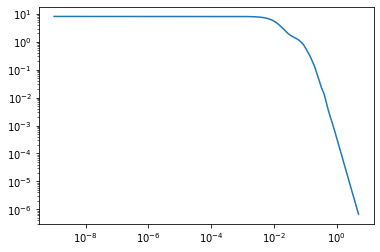

In [14]:
from matplotlib.pyplot import *
plot(c1[0:200], c2[0:200])
xscale('log'); yscale('log')

In [10]:
def change_func(func):
    def new_func(x):
        print("How did I get in here??")
        result = func(x)
        print("whoooooooooo spooky")
        return result
    return new_func

@change_func
def f(x):
    return x**2

In [8]:
f = change_func(f)

How did I get in here??
whoooooooooo spooky


10000